In [3]:
import numpy as np
import pandas as pd

#regression
from sklearn.ensemble import RandomForestRegressor

#model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

import matplotlib.pyplot as plt

#Data preparationpath
taiwan=pd.read_csv("Taiwan - Taiwan.csv", parse_dates=True)

In [4]:
taiwan=taiwan[['district','transaction_year','building_shift_total_area','PRICE_USD']]
taiwan.head()

,district,transaction_year,building_shift_total_area,PRICE_USD
0,Zhongzheng District,2019,0.00,5.704100e+04
1,Wenshan District,2019,109.36,4.224599e+05
2,Wenshan District,2019,109.42,3.565062e+05
3,Wenshan District,2019,163.53,7.486631e+05
4,Wenshan District,2019,204.79,2.395843e+06


In [5]:
taiwan.isna().sum()

district                     0
transaction_year             0
building_shift_total_area    0
PRICE_USD                    0
dtype: int64

<ipython-input-6-cf9c427050eb>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_X,train_y)


Modelling Algorithm: RandomForestRegressor
RMSLE: 1.2110966005084751


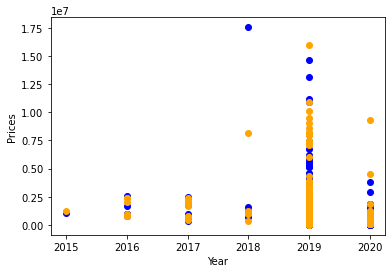

In [6]:
#Training model
x = taiwan[['transaction_year', 'building_shift_total_area']]
y = taiwan[['PRICE_USD']] 

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

models=[RandomForestRegressor()]
model_names=['RandomForestRegressor']
rmsle=""

clf=RandomForestRegressor()
clf.fit(train_X,train_y)
test_pred=clf.predict(test_X)
rmsle=str(np.sqrt(mean_squared_log_error(test_pred,test_y)))

print("Modelling Algorithm: " + "RandomForestRegressor\n" + "RMSLE: " + rmsle)

plt.scatter(test_X["transaction_year"], test_y, color='blue')
plt.scatter(test_X["transaction_year"], test_pred, color='orange')
plt.xlabel("Year")
plt.ylabel("Prices")
plt.show()

In [7]:
# Generating a few examples
print ("These are the first five entries")
print (test_X[:5])
print ("These are the model prediction for these entries")
print (clf.predict(test_X[:5]))
print ("These are the actual prices")
print (test_y[:5])

These are the first five entries
      transaction_year  building_shift_total_area
4323              2019                     155.72
394               2019                       0.00
3663              2019                      65.76
1034              2019                      96.41
2771              2019                      90.61
These are the model prediction for these entries
[ 891068.38976998 1225299.82817229  482716.47567697  635633.98695533
  412584.670229  ]
These are the actual prices
         PRICE_USD
4323  9.219251e+05
394   3.471070e+04
3663  2.862745e+05
1034  1.218538e+06
2771  4.634581e+05


/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/env

Modelling Algorithm: RandomForestRegressor
RMSLE: 1.203798691799859


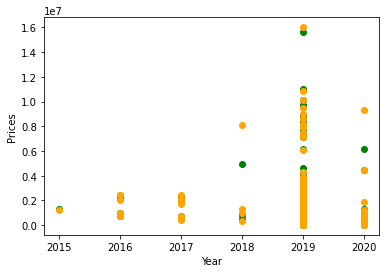

In [8]:
#parameter tuning
params_dict={'n_estimators':[200],'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(train_X,train_y)
predi=clf_rf.predict(test_X)
print("Modelling Algorithm: " + "RandomForestRegressor\n" + "RMSLE: " + str(np.sqrt(mean_squared_log_error(predi,test_y))))

plt.scatter(test_X["transaction_year"], predi, color='green')
plt.scatter(test_X["transaction_year"], test_pred, color='orange')
plt.xlabel("Year")
plt.ylabel("Prices")
plt.show()

/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/env

Modelling Algorithm: RandomForestRegressor
RMSLE: 1.2089988720054032


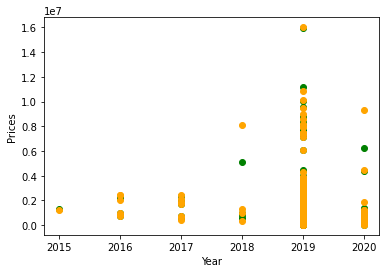

In [9]:
#parameter tuning
params_dict={'n_estimators':[500],'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(train_X,train_y)
predi=clf_rf.predict(test_X)
print("Modelling Algorithm: " + "RandomForestRegressor\n" + "RMSLE: " + str(np.sqrt(mean_squared_log_error(predi,test_y))))

plt.scatter(test_X["transaction_year"], predi, color='green')
plt.scatter(test_X["transaction_year"], test_pred, color='orange')
plt.xlabel("Year")
plt.ylabel("Prices")
plt.show()

/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jolinchou/opt/anaconda3/env

Modelling Algorithm: RandomForestRegressor
RMSLE: 1.2083218011360914


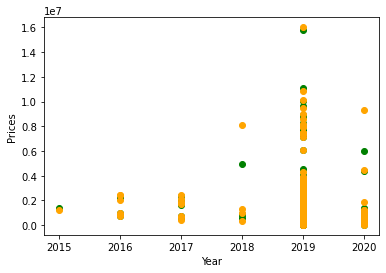

In [10]:
#parameter tuning
params_dict={'n_estimators':[1000],'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(train_X,train_y)
predi=clf_rf.predict(test_X)
print("Modelling Algorithm: " + "RandomForestRegressor\n" + "RMSLE: " + str(np.sqrt(mean_squared_log_error(predi,test_y))))

plt.scatter(test_X["transaction_year"], predi, color='green')
plt.scatter(test_X["transaction_year"], test_pred, color='orange')
plt.xlabel("Year")
plt.ylabel("Prices")
plt.show()

In [11]:
# Generating a few examples
print ("These are the first five entries")
print (test_X[:5])
print ("These are the model prediction for these entries")
print (clf_rf.predict(test_X[:5]))
print ("These are the actual prices")
print (test_y[:5])

These are the first five entries
      transaction_year  building_shift_total_area
4323              2019                     155.72
394               2019                       0.00
3663              2019                      65.76
1034              2019                      96.41
2771              2019                      90.61
These are the model prediction for these entries
[ 891150.81401287 1207035.72330878  477749.40836346  635585.3237368
  409521.68745882]
These are the actual prices
         PRICE_USD
4323  9.219251e+05
394   3.471070e+04
3663  2.862745e+05
1034  1.218538e+06
2771  4.634581e+05
